### Caso 1: Processamento de Pedidos em um E-commerce de Pequeno Porte

**Cenário:**  
Uma loja virtual recebe pedidos de clientes de forma aleatória durante o dia. O objetivo é simular o fluxo de pedidos, o atendimento por parte dos funcionários responsáveis por embalar e preparar os pedidos para envio e o tempo total que cada pedido fica no sistema.

**Informações e Parâmetros Necessários:**  
- **Chegada dos Pedidos:**  
  - Os pedidos chegam seguindo um processo de Poisson.   
  - Parâmetro Lambda: taxa média de chegada (5 minutos).

- **Recursos de Atendimento:**  
  - Há 2 funcionários responsáveis pelo processamento dos pedidos.  
  - Cada funcionário processa um pedido por vez.

- **Tempo de Processamento:**  
  - O tempo para embalar e preparar um pedido segue uma distribuição exponencial com média de 3 minutos.  
  - Esse tempo representa o serviço prestado por um funcionário.

- **Duração da Simulação:**  
  - Simular o funcionamento durante um dia de operação (por exemplo, 8 horas de expediente).

- **Objetivos:**  
  - Medir o tempo médio de espera dos pedidos na fila.  
  - Verificar a utilização dos funcionários.  
  - Analisar se o tempo de processamento atende à demanda e identificar possíveis gargalos.

In [276]:
import simpy
import numpy as np
import random
import logging

formatter = logging.Formatter('%(asctime)s | %(levelname)2s | %(message)s', datefmt="%Y-%m-%d %H:%M")
console_handler = logging.StreamHandler()
console_handler.setFormatter(formatter)

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

for handler in logger.handlers:
    logger.removeHandler(handler)

logger.addHandler(console_handler)

In [283]:
class Packaging:
    def __init__(self, env):
        self.workers = simpy.Resource(env, capacity=2)
        self.env = env

    def package(self, name):
        with self.workers.request() as req:
            logger.info(f"Order #{name:03d} | Resource Request   | Sim time: {round(self.env.now,2):04}")
            yield req
            logger.info(f"Order #{name:03d} | Got Resource       | Sim time: {round(self.env.now,2):04}")
            time_to_finish = random.expovariate(1/3)
            start_time = self.env.now
            logger.info(f"Order #{name:03d} | Start packaging    | Sim time: {round(self.env.now,2):04}")
            yield self.env.timeout(time_to_finish)
            logger.info(f"Order #{name:03d} | Finished packaging | Sim time: {round(self.env.now,2):04}")

def package_order(env, name, packaging_op):
    logger.info(f"Order #{name:03d} | Created            | Sim time: {round(env.now,2):04}")
    yield env.process(packaging_op.package(name=name))

def order_generator(env, pack_op):
    i = 1
    while True:
        tt_next_request = random.expovariate(1/5)  # 5 min on avg
        env.process(package_order(env, i, pack_op))
        yield env.timeout(tt_next_request)
        i += 1

Para chegar na nota 10/10, você precisaria:

Adicionar coleta de métricas:

Registrar o tempo que cada pedido passa na fila (wait_time = start_time - create_time)
Calcular o tempo total no sistema (total_time = finish_time - create_time)
Medir a utilização dos recursos (quanto tempo os funcionários ficam ocupados)


Definir parâmetros da simulação explicitamente:

Duração de 8 horas (480 minutos)
Inicializar as variáveis de estatísticas


Produzir relatório de resultados:

Calcular médias, máximos e mínimos dos tempos de espera
Gerar gráficos de distribuição de tempos
Mostrar taxa de utilização dos funcionários


Pequenas correções técnicas:

Corrigir a referência env.now no método package para self.env.now
Adicionar lista para armazenar os resultados de cada pedido


Melhorias avançadas:

Implementar variações de demanda ao longo do dia (períodos de pico)
Adicionar opções para simular diferentes números de funcionários
Incluir pausas dos funcionários (almoço, descanso)

In [284]:
env = simpy.Environment()
ecom = Packaging(env)
env.process(order_generator(env,ecom))
env.run(until=8*60)

2025-03-26 01:18 | INFO | Order #001 | Created            | Sim time: 0000
2025-03-26 01:18 | INFO | Order #001 | Resource Request   | Sim time: 0000
2025-03-26 01:18 | INFO | Order #001 | Got Resource       | Sim time: 0000
2025-03-26 01:18 | INFO | Order #001 | Start packaging    | Sim time: 0000
2025-03-26 01:18 | INFO | Order #001 | Finished packaging | Sim time: 00.2
2025-03-26 01:18 | INFO | Order #002 | Created            | Sim time: 11.33
2025-03-26 01:18 | INFO | Order #002 | Resource Request   | Sim time: 11.33
2025-03-26 01:18 | INFO | Order #002 | Got Resource       | Sim time: 11.33
2025-03-26 01:18 | INFO | Order #002 | Start packaging    | Sim time: 11.33
2025-03-26 01:18 | INFO | Order #002 | Finished packaging | Sim time: 11.53
2025-03-26 01:18 | INFO | Order #003 | Created            | Sim time: 17.57
2025-03-26 01:18 | INFO | Order #003 | Resource Request   | Sim time: 17.57
2025-03-26 01:18 | INFO | Order #003 | Got Resource       | Sim time: 17.57
2025-03-26 01:18 

In [15]:
import simpy
import numpy as np
import random
import logging

logger = logging.getLogger(__name__)
logging.basicConfig(encoding='utf-8', level=logging.INFO)

In [16]:
def request_generator(env):
    i = 1
    while True:
        tt_next_request = random.expovariate(1/5)  # 5 min on avg
        logger.info(f"Request {i} has arrived at {env.now}")
        yield env.timeout(tt_next_request)

env = simpy.Environment()
env.process(request_generator(env))
env.run(until=10)

In [4]:
# Gerar número de pedidos para cada hora do dia
for hora in range(8):  # 8 horas de trabalho
    num_pedidos = np.random.poisson(12)  # lambda = 12 pedidos/hora
    print(f"Hora {hora+1}: {num_pedidos} pedidos")

Hora 1: 14 pedidos
Hora 2: 9 pedidos
Hora 3: 16 pedidos
Hora 4: 17 pedidos
Hora 5: 15 pedidos
Hora 6: 14 pedidos
Hora 7: 22 pedidos
Hora 8: 9 pedidos


In [150]:
import random

In [151]:
hora_atual = 0
tempo_atual = 0
pedidos_por_hora = [0] * 8

while tempo_atual < 8*60:  # 8 horas em minutos
    # Gerar tempo até próximo pedido (distribuição exponencial)
    tempo_ate_proximo = random.expovariate(1/5)  # média = 5 minutos
    
    # Atualizar o tempo atual
    tempo_atual += tempo_ate_proximo
    
    # Se ainda estamos dentro do expediente
    if tempo_atual < 8*60:
        # Determinar em qual hora este pedido chegou
        hora = int(tempo_atual // 60)
        # Incrementar contador para esta hora
        pedidos_por_hora[hora] += 1

for hora in range(8):
    print(f"Hora {hora+1}: {pedidos_por_hora[hora]} pedidos")

Hora 1: 19 pedidos
Hora 2: 9 pedidos
Hora 3: 14 pedidos
Hora 4: 12 pedidos
Hora 5: 13 pedidos
Hora 6: 17 pedidos
Hora 7: 18 pedidos
Hora 8: 14 pedidos


In [154]:
# Para simular quantos pedidos chegarão em 1 hora
pedidos_em_uma_hora = np.random.poisson(12)  # lambda = 12

# Para simular quantos pedidos chegarão em 5 minutos
pedidos_em_cinco_minutos = np.random.poisson(1)  # lambda = 1

In [155]:
pedidos_em_uma_hora

8

In [156]:
pedidos_em_cinco_minutos

2

In [207]:
def gerador_pedidos(env):
    while True:
        # Chegou um pedido
        tempo_ate_proximo = random.expovariate(1/5)  # média = 5 minutos
        print(f"Pedido chegou no tempo {env.now}, vamos esperar {tempo_ate_proximo} até o próximo")
        
        yield env.timeout(tempo_ate_proximo)

env = simpy.Environment()
env.process(gerador_pedidos(env))
env.run(until=10)

Pedido chegou no tempo 0, vamos esperar 1.567721450898832 até o próximo
Pedido chegou no tempo 1.567721450898832, vamos esperar 0.22910251040663163 até o próximo
Pedido chegou no tempo 1.7968239613054635, vamos esperar 1.047687682258894 até o próximo
Pedido chegou no tempo 2.8445116435643576, vamos esperar 10.917305400697112 até o próximo


In [279]:
tempo = 60
x = [[np.random.poisson(1/5) for _ in range(tempo)] for _ in range(200)]

(array([ 4., 16., 33., 72., 30., 20., 22.,  2.,  0.,  1.]),
 array([ 3. ,  5.3,  7.6,  9.9, 12.2, 14.5, 16.8, 19.1, 21.4, 23.7, 26. ]),
 <BarContainer object of 10 artists>)

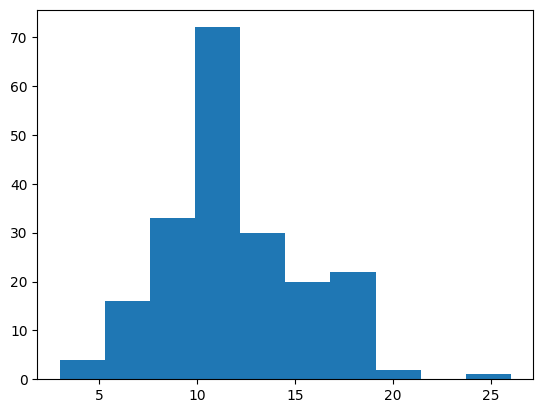

In [280]:
plt.hist([sum(hora) for hora in x])